### 2.2 Importing Librairies

In [3]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen

print("*********   Loaded library     ***********")

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

*********   Loaded library     ***********


### 2.3 Data Cleaning  

In [578]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table=soup.find('table', attrs={'class':'wikitable sortable'})

In [579]:

PostalCodes=[]
Boroughs = []
Neighbourhoods = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    
    if len(cells)==3:
        PostalCodes.append(cells[0].find(text=True))
        Boroughs.append(cells[1].find(text=True))
        Neighbourhoods.append(cells[2].find(text=True))

In [580]:
df=pd.DataFrame(PostalCodes,columns=['Postal Code'])
df['Borough'] = Boroughs
df['Neighbourhood']=Neighbourhoods
df = df.drop(df[(df.Borough=='Not assigned\n')].index)
df['Postal Code'] = df['Postal Code'].str.replace('\n','')
df['Borough'] = df['Borough'].str.replace('\n','')
df['Neighbourhood'] = df['Neighbourhood'].str.replace('\n','')
df['Neighbourhood'] = df['Neighbourhood'].str.replace('/',', ')
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df['Neighbourhood'] = df['Neighbourhood'].apply(lambda x: x.split(', '))
df = df.explode('Neighbourhood')
df

Postal Code           Borough                          Neighbourhood
0           M3A        North York                              Parkwoods
1           M4A        North York                       Victoria Village
2           M5A  Downtown Toronto                           Regent Park 
2           M5A  Downtown Toronto                           Harbourfront
3           M6A        North York                        Lawrence Manor 
3           M6A        North York                       Lawrence Heights
4           M7A  Downtown Toronto                          Queen's Park 
4           M7A  Downtown Toronto          Ontario Provincial Government
5           M9A         Etobicoke                       Islington Avenue
6           M1B       Scarborough                               Malvern 
6           M1B       Scarborough                                  Rouge
7           M3B        North York                              Don Mills
8           M4B         East York                         Parkview Hill 
8           M4B         East York                       Woodbine Gardens
9           M5B  Downtown Toronto                        Garden District
9           M5B  Downtown Toronto                                Ryerson
10          M6B        North York                              Glencairn
11          M9B         Etobicoke                       West Deane Park 
11          M9B         Etobicoke                      Princess Gardens 
11          M9B         Etobicoke                          Martin Grove 
11          M9B         Etobicoke                             Islington 
11          M9B         Etobicoke                             Cloverdale
12          M1C       Scarborough                            Rouge Hill 
12          M1C       Scarborough                            Port Union 
12          M1C       Scarborough                         Highland Creek
13          M3C        North York                              Don Mills
14          M4C         East York                       Woodbine Heights
15          M5C  Downtown Toronto                         St. James Town
16          M6C              York                     Humewood-Cedarvale
17          M9C         Etobicoke                              Eringate 
17          M9C         Etobicoke                     Bloordale Gardens 
17          M9C         Etobicoke                     Old Burnhamthorpe 
17          M9C         Etobicoke                          Markland Wood
18          M1E       Scarborough                             Guildwood 
18          M1E       Scarborough                           Morningside 
18          M1E       Scarborough                              West Hill
19          M4E      East Toronto                            The Beaches
20          M5E  Downtown Toronto                            Berczy Park
21          M6E              York                    Caledonia-Fairbanks
22          M1G       Scarborough                                 Woburn
23          M4G         East York                                Leaside
24          M5G  Downtown Toronto                     Central Bay Street
25          M6G  Downtown Toronto                               Christie
26          M1H       Scarborough                              Cedarbrae
27          M2H        North York                      Hillcrest Village
28          M3H        North York                        Bathurst Manor 
28          M3H        North York                        Wilson Heights 
28          M3H        North York                        Downsview North
29          M4H         East York                       Thorncliffe Park
30          M5H  Downtown Toronto                              Richmond 
30          M5H  Downtown Toronto                              Adelaide 
30          M5H  Downtown Toronto                                   King
31          M6H      West Toronto                              Dufferin 
31          M6H      West Toronto                     Dovercou

In [587]:
dfGeo = pd.read_csv("http://cocl.us/Geospatial_data")
dfGeo.set_index("Postal Code")
df.set_index("Postal Code")

TorontoData = pd.merge(df,dfGeo)

In [588]:
TorontoData.head(10)

Postal Code           Borough                   Neighbourhood   Latitude  \
0         M3A        North York                       Parkwoods  43.753259   
1         M4A        North York                Victoria Village  43.725882   
2         M5A  Downtown Toronto                    Regent Park   43.654260   
3         M5A  Downtown Toronto                    Harbourfront  43.654260   
4         M6A        North York                 Lawrence Manor   43.718518   
5         M6A        North York                Lawrence Heights  43.718518   
6         M7A  Downtown Toronto                   Queen's Park   43.662301   
7         M7A  Downtown Toronto   Ontario Provincial Government  43.662301   
8         M9A         Etobicoke                Islington Avenue  43.667856   
9         M1B       Scarborough                        Malvern   43.806686   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.360636  
4 -79.464763  
5 -79.464763  
6 -79.389494  
7 -79.389494  
8 -79.532242  
9 -79.194353

The second Data which is the crimes in Toronto Neighborhoods loaded by a CSV file taken by Toronto polish departement 

## Part one : Crimes data in Toronto Neighborhood : 

In [481]:
CrimeData = pd.read_csv(r'C:\Users\Soheib\Desktop\neigh.csv')

In [482]:
CrimeData.drop(['Assault_2014' , 'Assault_2015' , 'Assault_2016','Assault_2017','Assault_2018','Assault_2019','Assault_Rate_2019','Assault_CHG'] , axis = 1 ,inplace=True)
CrimeData.drop(['AutoTheft_2014','AutoTheft_2015','AutoTheft_2016','AutoTheft_2017','AutoTheft_2018','AutoTheft_2019','AutoTheft_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['BreakandEnter_2014','BreakandEnter_2015','BreakandEnter_2016','BreakandEnter_2017','BreakandEnter_2018','BreakandEnter_2019','BreakandEnter_Rate_2019','AutoTheft_Rate_2019','BreakandEnter_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['Homicide_2014','Homicide_2015','Homicide_2016','Homicide_2017','Homicide_2018','Homicide_2019','Homicide_Rate_2019','Homicide_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['TheftOver_2014','TheftOver_2015','TheftOver_2016','TheftOver_2017','TheftOver_2018','TheftOver_2019','TheftOver_Rate_2019','TheftOver_CHG'] , axis = 1 , inplace = True)
CrimeData.drop(['Robbery_2014','Robbery_2015','Robbery_2016','Robbery_2017','Robbery_2018','Robbery_2019','Robbery_Rate_2019','Robbery_CHG'] , axis = 1 , inplace = True)
CrimeData.drop('OBJECTID',axis=1,inplace=True)
CrimeData.drop('Shape__Area',axis=1,inplace=True)
CrimeData.drop('Shape__Length',axis=1,inplace=True)

CrimeData.head()

Neighbourhood  Hood_ID  Population  Assault_AVG  AutoTheft_AVG  \
0           Yonge-St.Clair       97       12528         31.0            4.3   
1  York University Heights       27       27593        333.2          106.3   
2         Lansing-Westgate       38       16164         70.7           23.7   
3       Yorkdale-Glen Park       31       14804        160.2           55.5   
4      Stonegate-Queensway       16       25051         83.2           28.7   

   BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  TheftOver_AVG  
0               23.3           0.0          5.7            4.3  
1              113.2           0.8         75.8           36.3  
2               38.8           1.7         14.7            7.0  
3               63.3           1.2         31.5           22.5  
4               52.8           0.0         20.7            6.0

In [483]:
CrimeData.shape

(140, 9)

In [484]:
col_list = list(CrimeData)
col_list.remove('Hood_ID')
col_list.remove('Population')
CrimeData["total"]=CrimeData[col_list].sum(axis=1)
CrimeData.sort_values(['total'], ascending = False, axis = 0, inplace = True )
CrimeData.head()

Neighbourhood  Hood_ID  Population  Assault_AVG  \
39   Waterfront Communities-The Island       77       65913        851.8   
93                 Bay Street Corridor       76       25797        771.0   
22               Church-Yonge Corridor       75       31340        642.8   
41              West Humber-Clairville        1       33312        301.8   
131                          Moss Park       73       20506        474.7   

     AutoTheft_AVG  BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  \
39            53.7              247.3           1.0         82.2   
93            32.8              158.7           1.5        121.3   
22            37.8              188.5           2.0        135.7   
41           366.7              137.8           1.5         91.8   
131           30.2              148.5           2.5        125.5   

     TheftOver_AVG   total  
39            56.2  1292.2  
93            52.3  1137.6  
22            33.8  1040.6  
41            52.2   951.8  
131           18.8   800.2

In [485]:
Crim = CrimeData.reset_index()
Crim.drop('index',axis=1,inplace=True)
Crim.head(10)

Neighbourhood  Hood_ID  Population  Assault_AVG  \
0  Waterfront Communities-The Island       77       65913        851.8   
1                Bay Street Corridor       76       25797        771.0   
2              Church-Yonge Corridor       75       31340        642.8   
3             West Humber-Clairville        1       33312        301.8   
4                          Moss Park       73       20506        474.7   
5            York University Heights       27       27593        333.2   
6               Downsview-Roding-CFB       26       35052        395.8   
7               Kensington-Chinatown       78       17945        368.2   
8                             Woburn      137       53485        384.7   
9                          West Hill      136       27392        402.0   

   AutoTheft_AVG  BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  TheftOver_AVG  \
0           53.7              247.3           1.0         82.2           56.2   
1           32.8              158.7           1.5        121.3           52.3   
2           37.8              188.5           2.0        135.7           33.8   
3          366.7              137.8           1.5         91.8           52.2   
4           30.2              148.5           2.5        125.5           18.8   
5          106.3              113.2           0.8         75.8           36.3   
6          107.8               78.8           1.3         64.7           15.2   
7           27.5              150.8           1.5         64.0           26.7   
8           46.0              105.2           1.2         83.5           13.7   
9           26.5               82.5           0.8         65.2            6.7   

    total  
0  1292.2  
1  1137.6  
2  1040.6  
3   951.8  
4   800.2  
5   665.6  
6   663.6  
7   638.7  
8   634.3  
9   583.7

-------------------------------------------------------------------------------------------------------------------------------

In [79]:
CLIENT_ID = 'USPSL4O2D3FLVL1HDEP4JRRH1QE1QD1NYVNLJP502ZECCQGE' # your Foursquare ID
CLIENT_SECRET = 'ZRQ15TPTGQTUGCA3BJISCYVINHAG4WBRF00VPCMISBW3QJBF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: USPSL4O2D3FLVL1HDEP4JRRH1QE1QD1NYVNLJP502ZECCQGE
CLIENT_SECRET:ZRQ15TPTGQTUGCA3BJISCYVINHAG4WBRF00VPCMISBW3QJBF


-------------------------------------------------------------------------------------------------------------------------------

## Part two : list of Toronto Neighborhoodss and their Boroughs :

In [511]:
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
url = 'https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [512]:
table=soup.find('tbody')
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [513]:
Boroughs = []
Neighbourhoods = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    
    if len(cells)==5:
       
        Boroughs.append(cells[2].find(text=True))
        Neighbourhoods.append(cells[3].find(text=True))

In [514]:
df4=pd.DataFrame(Boroughs,columns=['Borough'])
df4['Neighbourhood']=Neighbourhoods
df4.head()

Borough Neighbourhood
0          Scarborough\n     Agincourt
1          Scarborough\n     Agincourt
2            Etobicoke\n     Alderwood
3  Old City of Toronto\n     The Annex
4           North York\n     Don Mills

In [515]:
df4['Borough'] = df4['Borough'].str.replace('\n','')
df4['Neighbourhood'] = df4['Neighbourhood'].str.replace('\n','')


In [516]:
df4['Borough'].value_counts()

Old City of Toronto    44
North York             33
Scarborough            25
Etobicoke              20
York                   10
East York               8
Name: Borough, dtype: int64

In [517]:
df4.head(10)

Borough    Neighbourhood
0          Scarborough        Agincourt
1          Scarborough        Agincourt
2            Etobicoke        Alderwood
3  Old City of Toronto        The Annex
4           North York        Don Mills
5           North York   Bathurst Manor
6  Old City of Toronto       Bay Street
7           North York  Bayview Village
8           North York    Bayview Woods
9           North York     Bedford Park

## Part three : Crimes in Toronto boroughs 

### Merging the date of part one and two 

In [518]:
df_merge = pd.merge(df4, CrimeData )

In [519]:
df_merge2.sort_values(['total'], ascending = False, axis = 0, inplace = True )
DATA = df_merge2.reset_index()
DATA.drop('index',axis=1,inplace=True)
DATA


Borough  Population  Assault_AVG  AutoTheft_AVG  \
0          Scarborough      259450       1635.9          306.2   
1           North York      162689        811.6          263.7   
2            Etobicoke       89067        550.1          112.1   
3  Old City of Toronto       82751        527.2           76.5   
4                 York       34803        225.0           40.2   
5            East York       27699        138.6           12.9   

   BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  TheftOver_AVG   total  
0              584.5           5.6        354.4           70.3  2956.9  
1              315.2           3.1        157.8           63.2  1614.6  
2              193.6           2.2         71.9           31.5   961.4  
3              233.8           2.1         74.5           33.2   947.3  
4               50.5           1.5         48.1            5.2   370.5  
5               57.9           0.9         23.1            6.9   240.3

###### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Methodology Section 

1. The methodology in this project consists of two parts: <br>
.<span style='color:Blue'> Exploratory Data Analysis: </span> Visualise the crime rates in the London boroughs to idenity the safest borough and extract the neighborhoods in that borough to find the 10 most common venues in each neighborhood.<br>
.<span style='color:Blue'> Modeling: </span> To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size.We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood.

## Exploratory Data Analysis :

In [504]:
DATA.describe()

Population  Assault_AVG  AutoTheft_AVG  BreakandEnter_AVG  \
count       6.000000     6.000000       6.000000           6.000000   
mean   109409.833333   648.066667     135.266667         239.250000   
std     87997.824224   541.351227     121.420602         197.784719   
min     27699.000000   138.600000      12.900000          50.500000   
25%     46790.000000   300.550000      49.275000          91.825000   
50%     85909.000000   538.650000      94.300000         213.700000   
75%    144283.500000   746.225000     225.800000         294.850000   
max    259450.000000  1635.900000     306.200000         584.500000   

       Homicide_AVG  Robbery_AVG  TheftOver_AVG        total  
count      6.000000     6.000000       6.000000     6.000000  
mean       2.566667   121.633333      35.050000  1181.833333  
std        1.658513   122.718600      27.329307   998.648306  
min        0.900000    23.100000       5.200000   240.300000  
25%        1.650000    54.050000      13.050000   514.700000  
50%        2.150000    73.200000      32.350000   954.350000  
75%        2.875000   136.975000      55.700000  1451.300000  
max        5.600000   354.400000      70.300000  2956.900000

In [505]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.3


In [524]:
df_top5 = DATA.head(5)

In [525]:
df_top5

Borough  Population  Assault_AVG  AutoTheft_AVG  \
0          Scarborough      259450       1635.9          306.2   
1           North York      162689        811.6          263.7   
2            Etobicoke       89067        550.1          112.1   
3  Old City of Toronto       82751        527.2           76.5   
4                 York       34803        225.0           40.2   

   BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  TheftOver_AVG   total  
0              584.5           5.6        354.4           70.3  2956.9  
1              315.2           3.1        157.8           63.2  1614.6  
2              193.6           2.2         71.9           31.5   961.4  
3              233.8           2.1         74.5           33.2   947.3  
4               50.5           1.5         48.1            5.2   370.5

### Visualize the five boroughs with the highest number of crimes

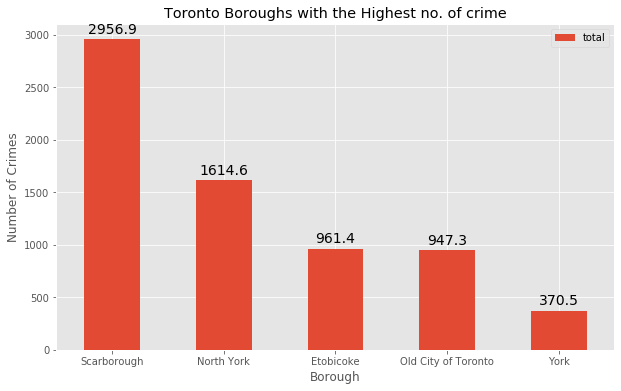

In [526]:
df_tt = df_top5[['Borough','total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Toronto Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Visualize the population

In [533]:
import matplotlib.pyplot as plt

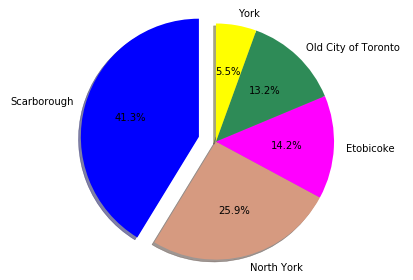

In [541]:

colors = ["#0000FF", "#D69A80", "#FF00FF", "#2E8B57", "#FFFF00"]
plt.pie(df_top5['Population'],  labels=df_top5['Borough'], shadow=True, colors=colors,  explode=(0.15, 0, 0, 0, 0),  startangle=90, 
        autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()



## Visualize the three boroughs with the least number of crimes

In [546]:
df_merge2.sort_values(['total'], ascending = True, axis = 0, inplace = True )
DATA_2 = df_merge2.reset_index()
DATA_2.drop('index',axis=1,inplace=True)
DATA_DOWN= DATA_2.head(3)
DATA_DOWN

Borough  Population  Assault_AVG  AutoTheft_AVG  \
0            East York       27699        138.6           12.9   
1                 York       34803        225.0           40.2   
2  Old City of Toronto       82751        527.2           76.5   

   BreakandEnter_AVG  Homicide_AVG  Robbery_AVG  TheftOver_AVG  total  
0               57.9           0.9         23.1            6.9  240.3  
1               50.5           1.5         48.1            5.2  370.5  
2              233.8           2.1         74.5           33.2  947.3

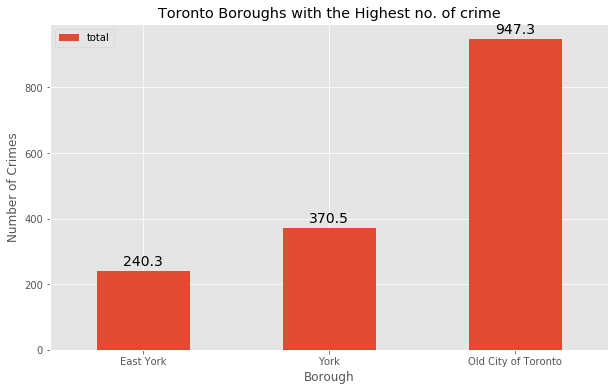

In [547]:
df_tt = DATA_DOWN[['Borough','total']]

df_tt.set_index('Borough',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Borough') # add y-label to the plot
ax.set_title('Toronto Boroughs with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### The borough <span style='color:Blue'> East York </span> has the lowest no. of crimes , Looking into the details of the borough:

In [735]:
df_best = DATA_DOWN[DATA_DOWN['Borough'] == 'East York']
df_best = df_best[['Borough','Population','total']]
df_best

Borough  Population  total
0  East York       27699  240.3

In [770]:
cond = df['Borough']=='East York' 
fin = df[cond]
final_data = fin.reset_index()
final_data.drop('index',axis=1,inplace=True)
final_data.head()

Postal Code    Borough      Neighbourhood
0         M4B  East York     Parkview Hill 
1         M4B  East York   Woodbine Gardens
2         M4C  East York   Woodbine Heights
3         M4G  East York            Leaside
4         M4H  East York   Thorncliffe Park

In [771]:
df_Ey = DATA_DOWN[DATA_DOWN['Borough']=='East York']
df_Ey.drop('Population', axis = 1 , inplace = True )
df_Ey.drop('total', axis = 1 , inplace = True )
df_Ey.set_index('Borough',inplace = True)

C:\Users\Soheib\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


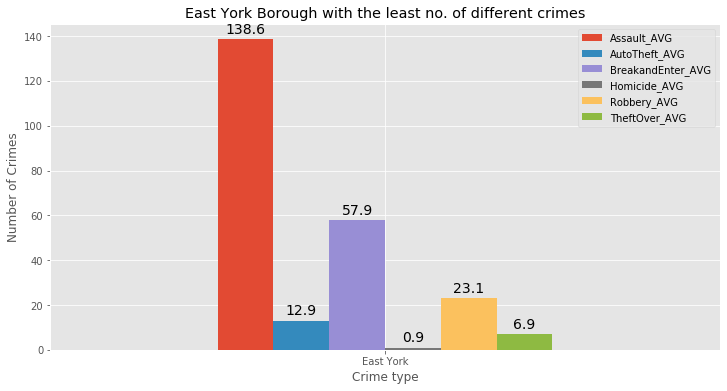

In [772]:


ax = df_Ey.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Crime type') # add y-label to the plot
ax.set_title('East York Borough with the least no. of different crimes') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### We conclude that East York is the safest Borough in Toronto 

# Part 3: Creating a new dataset of the Neighborhoods of the safest borough in Toronto and generating their coordinates : 

In [840]:
#cond1 = TorontoData['Borough']=='East York' 
#cond = TorontoData[(TorontoData['Borough']=='East York') | (TorontoData['Borough'] == 'York')]
options = ['York', 'East York']
cond = TorontoData['Borough'].isin(options)

In [841]:
fin = TorontoData[cond]
final_data = fin.reset_index()
final_data.drop('index',axis=1,inplace=True)
final_data

Postal Code    Borough               Neighbourhood   Latitude  Longitude
0          M4B  East York              Parkview Hill   43.706397 -79.309937
1          M4B  East York            Woodbine Gardens  43.706397 -79.309937
2          M4C  East York            Woodbine Heights  43.695344 -79.318389
3          M6C       York          Humewood-Cedarvale  43.693781 -79.428191
4          M6E       York         Caledonia-Fairbanks  43.689026 -79.453512
5          M4G  East York                     Leaside  43.709060 -79.363452
6          M4H  East York            Thorncliffe Park  43.705369 -79.349372
7          M4J  East York                East Toronto  43.685347 -79.338106
8          M6M       York                    Del Ray   43.691116 -79.476013
9          M6M       York               Mount Dennis   43.691116 -79.476013
10         M6M       York   Keelsdale and Silverthorn  43.691116 -79.476013
11         M6N       York                  Runnymede   43.673185 -79.487262
12         M6N       York          The Junction North  43.673185 -79.487262
13         M9N       York                      Weston  43.706876 -79.518188

### now we will search the safest Neighborhood in East York : 

In [842]:
EY = pd.merge(final_data,Crim)


In [843]:
address = 'East York, Toronto, Canada'
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of East York, Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of East York, Toronto are 43.699971000000005, -79.33251996261595.


### Visualize the Neighborhood of East York Borough

In [861]:
map_lon = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_data['Latitude'], final_data['Longitude'], final_data['Borough'], final_data['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_lon)  
    
map_lon


Modelling 
Finding all the venues within a 500 meter radius of each neighborhood.
Perform one hot ecoding on the venues data.
Grouping the venues by the neighborhood and calculating their mean.
Performing a K-means clustering (Defining K = 5)

## Create a function to extract the venues from each Neighborhood

In [845]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [846]:
k_venues = getNearbyVenues(names=final_data['Neighbourhood'],
                                   latitudes=final_data['Latitude'],
                                   longitudes=final_data['Longitude']
                                  )

Parkview Hill 
 Woodbine Gardens
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
East Toronto
Del Ray 
 Mount Dennis 
 Keelsdale and Silverthorn
Runnymede 
 The Junction North
Weston


In [864]:
print(k_venues.shape)
k_venues.head(20)

(485, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Parkview Hill               43.706397              -79.309937   
1   Parkview Hill               43.706397              -79.309937   
2   Parkview Hill               43.706397              -79.309937   
3   Parkview Hill               43.706397              -79.309937   
4   Parkview Hill               43.706397              -79.309937   
5   Parkview Hill               43.706397              -79.309937   
6   Parkview Hill               43.706397              -79.309937   
7   Parkview Hill               43.706397              -79.309937   
8   Parkview Hill               43.706397              -79.309937   
9   Parkview Hill               43.706397              -79.309937   
10  Parkview Hill               43.706397              -79.309937   
11  Parkview Hill               43.706397              -79.309937   
12  Parkview Hill               43.706397              -79.309937   
13  Parkview Hill               43.706397              -79.309937   
14  Parkview Hill               43.706397              -79.309937   
15  Parkview Hill               43.706397              -79.309937   
16  Parkview Hill               43.706397              -79.309937   
17  Parkview Hill               43.706397              -79.309937   
18  Parkview Hill               43.706397              -79.309937   
19  Parkview Hill               43.706397              -79.309937   

                                         Venue  Venue Latitude  \
0                                 Jawny Bakers       43.705783   
1                     Toronto Climbing Academy       43.709362   
2                       Muddy York Brewing Co.       43.712362   
3                    Peek Freans Cookie Outlet       43.713260   
4                         East York Gymnastics       43.710654   
5                           Shoppers Drug Mart       43.705933   
6                              TD Canada Trust       43.705740   
7                                  Pizza Pizza       43.705159   
8                                  Tim Hortons       43.714401   
9                                     Harvey's       43.710964   
10                                   Nostalgia       43.706833   
11                     East York Animal Clinic       43.705921   
12                          Rise & Dine Eatery       43.705769   
13               St. Clair Ave E & O'Connor Dr       43.705233   
14                                Venice Pizza       43.705921   
15                                    Harvey's       43.708136   
16  TKTO - Toronto Knife Throwing Organization       43.709966   
17                          City Sports Centre       43.710764   
18    BeanWise (formerly Cultured Coffee Bean)       43.713249   
19                         Brunswick Bierworks       43.710667   

    Venue Longitude        Venue Category  
0        -79.312913             Gastropub  
1        -79.315006    Rock Climbing Spot  
2        -79.312019               Brewery  
3        -79.308063                Bakery  
4        -79.309279  Gym / Fitness Center  
5        -79.312825              Pharmacy  
6        -79.312270                  Bank  
7        -79.313130           Pizza Place  
8        -79.307356           Coffee Shop  
9        -79.309085  Fast Food Restaurant  
10       -79.311783                  Café  
11       -79.312196             Pet Store  
12       -79.311638        Breakfast Spot  
13       -79.313274          Intersection  
14       -79.313957           Pizza Place  
15       -79.314105  Fast Food Restaurant  
16       -79.313411    Athletics & Sports  
17       -79.316592        Soccer Stadium  
18       -79.307852           Coffee Shop  
19       -79.317720               Brewery

In [848]:
k_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
 Keelsdale and Silverthorn                     15                      15   
 Mount Dennis                                  15                      15   
 The Junction North                            48                      48   
 Woodbine Gardens                              21                      21   
Caledonia-Fairbanks                            21                      21   
Del Ray                                        15                      15   
East Toronto                                   95                      95   
Humewood-Cedarvale                             28                      28   
Leaside                                        60                      60   
Parkview Hill                                  21                      21   
Runnymede                                      48                      48   
Thorncliffe Park                               49                      49   
Weston                                         18                      18   
Woodbine Heights                               31                      31   

                            Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                         
 Keelsdale and Silverthorn     15              15               15   
 Mount Dennis                  15              15               15   
 The Junction North            48              48               48   
 Woodbine Gardens              21              21               21   
Caledonia-Fairbanks            21              21               21   
Del Ray                        15              15               15   
East Toronto                   95              95               95   
Humewood-Cedarvale             28              28               28   
Leaside                        60              60               60   
Parkview Hill                  21              21               21   
Runnymede                      48              48               48   
Thorncliffe Park               49              49               49   
Weston                         18              18               18   
Woodbine Heights               31              31               31   

                            Venue Category  
Neighborhood                                
 Keelsdale and Silverthorn              15  
 Mount Dennis                           15  
 The Junction North                     48  
 Woodbine Gardens                       21  
Caledonia-Fairbanks                     21  
Del Ray                                 15  
East Toronto                            95  
Humewood-Cedarvale                      28  
Leaside                                 60  
Parkview Hill                           21  
Runnymede                               48  
Thorncliffe Park                        49  
Weston                                  18  
Woodbine Heights                        31

In [849]:
print('There are {} uniques categories.'.format(len(k_venues['Venue Category'].unique())))

There are 109 uniques categories.


### One hot encoding

In [850]:
k_onehot = pd.get_dummies(k_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
k_onehot['Neighborhood'] = k_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [k_onehot.columns[-1]] + list(k_onehot.columns[:-1])
k_onehot = k_onehot[fixed_columns]

k_onehot.head()

Neighborhood  Afghan Restaurant  American Restaurant  Asian Restaurant  \
0  Parkview Hill                   0                    0                 0   
1  Parkview Hill                   0                    0                 0   
2  Parkview Hill                   0                    0                 0   
3  Parkview Hill                   0                    0                 0   
4  Parkview Hill                   0                    0                 0   

   Athletics & Sports  Auto Dealership  BBQ Joint  Bagel Shop  Bakery  Bank  \
0                   0                0          0           0       0     0   
1                   0                0          0           0       0     0   
2                   0                0          0           0       0     0   
3                   0                0          0           0       1     0   
4                   0                0          0           0       0     0   

   Bar  Beer Bar  Beer Store  Bike Shop  Bookstore  Breakfast Spot  Brewery  \
0    0         0           0          0          0               0        0   
1    0         0           0          0          0               0        0   
2    0         0           0          0          0               0        1   
3    0         0           0          0          0               0        0   
4    0         0           0          0          0               0        0   

   Bridge  Burger Joint  Burrito Place  Bus Line  Bus Stop  Business Service  \
0       0             0              0         0         0                 0   
1       0             0              0         0         0                 0   
2       0             0              0         0         0                 0   
3       0             0              0         0         0                 0   
4       0             0              0         0         0                 0   

   Café  Chinese Restaurant  Coffee Shop  Construction & Landscaping  \
0     0                   0            0                           0   
1     0                   0            0                           0   
2     0                   0            0                           0   
3     0                   0            0                           0   
4     0                   0            0                           0   

   Convenience Store  Cosmetics Shop  Curling Ice  Dance Studio  \
0                  0               0            0             0   
1                  0               0            0             0   
2                  0               0            0             0   
3                  0               0            0             0   
4                  0               0            0             0   

   Department Store  Dessert Shop  Dim Sum Restaurant  Diner  Discount Store  \
0                 0             0                   0      0               0   
1                 0             0                   0      0               0   
2                 0             0                   0      0               0   
3                 0             0                   0      0               0   
4                 0             0                   0      0               0   

   Dive Bar  Donut Shop  Electronics Store  Ethiopian Restaurant  \
0         0           0                  0                     0   
1         0           0                  0                     0   
2         0           0                  0                     0   
3         0           0                  0                     0   
4         0           0                  0                     0   

   Falafel Restaurant  Farmers Market  Fast Food Restaurant  Field  \
0                   0               0                     0      0   
1                   0               0                     0      0   
2                   0               0                     0      0   
3                   0               0                     0      0   
4                   0  

### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [851]:
k_grouped = k_onehot.groupby('Neighborhood').mean().reset_index()
k_grouped

Neighborhood  Afghan Restaurant  American Restaurant  \
0    Keelsdale and Silverthorn           0.000000             0.000000   
1                Mount Dennis            0.000000             0.000000   
2           The Junction North           0.000000             0.000000   
3             Woodbine Gardens           0.000000             0.000000   
4          Caledonia-Fairbanks           0.000000             0.000000   
5                     Del Ray            0.000000             0.000000   
6                 East Toronto           0.000000             0.021053   
7           Humewood-Cedarvale           0.000000             0.000000   
8                      Leaside           0.000000             0.000000   
9               Parkview Hill            0.000000             0.000000   
10                  Runnymede            0.000000             0.000000   
11            Thorncliffe Park           0.040816             0.000000   
12                      Weston           0.000000             0.000000   
13            Woodbine Heights           0.000000             0.000000   

    Asian Restaurant  Athletics & Sports  Auto Dealership  BBQ Joint  \
0           0.000000            0.000000         0.000000   0.000000   
1           0.000000            0.000000         0.000000   0.000000   
2           0.020833            0.020833         0.000000   0.020833   
3           0.000000            0.047619         0.000000   0.000000   
4           0.000000            0.000000         0.000000   0.000000   
5           0.000000            0.000000         0.000000   0.000000   
6           0.010526            0.000000         0.000000   0.010526   
7           0.000000            0.000000         0.000000   0.000000   
8           0.000000            0.000000         0.016667   0.016667   
9           0.000000            0.047619         0.000000   0.000000   
10          0.020833            0.020833         0.000000   0.020833   
11          0.000000            0.000000         0.000000   0.020408   
12          0.000000            0.000000         0.000000   0.000000   
13          0.000000            0.032258         0.000000   0.000000   

    Bagel Shop    Bakery      Bank       Bar  Beer Bar  Beer Store  Bike Shop  \
0     0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   0.000000   
2     0.000000  0.000000  0.000000  0.020833  0.000000    0.041667   0.000000   
3     0.000000  0.047619  0.047619  0.000000  0.000000    0.000000   0.000000   
4     0.000000  0.047619  0.047619  0.000000  0.000000    0.047619   0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   0.000000   
6     0.000000  0.021053  0.021053  0.021053  0.031579    0.010526   0.000000   
7     0.071429  0.000000  0.035714  0.000000  0.000000    0.000000   0.000000   
8     0.016667  0.016667  0.033333  0.000000  0.000000    0.016667   0.016667   
9     0.000000  0.047619  0.047619  0.000000  0.000000    0.000000   0.000000   
10    0.000000  0.000000  0.000000  0.020833  0.000000    0.041667   0.000000   
11    0.000000  0.000000  0.040816  0.000000  0.000000    0.020408   0.000000   
12    0.000000  0.000000  0.055556  0.000000  0.000000    0.000000   0.000000   
13    0.000000  0.000000  0.000000  0.000000  0.000000    0.032258   0.000000   

    Bookstore  Breakfast Spot   Brewery    Bridge  Burger Joint  \
0    0.000000        0.000000  0.000000  0.000000      0.000000   
1    0.000000        0.000000  0.000000  0.000000      0.000000   
2    0.000000        0.000000  0.062500  0.000000      0.020833   
3    0.000000        0.047619  0.095238  0.000000      0.000000   
4    0.000000        0.000000  0.000000  0.000000      0.000000   
5    0.000000        0.000000  0.000000  0.000000      0.000000   
6    0.010526        0.021053  0.000000  0.000000      0.010526   
7    0.000000        0.000000  0.000000  0.000000      0.000000   
8    0.

In [852]:
k_grouped.shape

(14, 110)

In [853]:
num_top_venues = 5

for hood in k_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = k_grouped[k_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Keelsdale and Silverthorn----
                        venue  freq
0      Furniture / Home Store  0.20
1               Grocery Store  0.13
2                 Gas Station  0.07
3           Convenience Store  0.07
4  Construction & Landscaping  0.07


---- Mount Dennis ----
                        venue  freq
0      Furniture / Home Store  0.20
1               Grocery Store  0.13
2                 Gas Station  0.07
3           Convenience Store  0.07
4  Construction & Landscaping  0.07


---- The Junction North----
         venue  freq
0  Coffee Shop  0.10
1  Pizza Place  0.10
2      Brewery  0.06
3         Park  0.06
4     Pharmacy  0.04


---- Woodbine Gardens----
                  venue  freq
0           Coffee Shop  0.10
1           Pizza Place  0.10
2               Brewery  0.10
3  Fast Food Restaurant  0.10
4          Intersection  0.05


----Caledonia-Fairbanks----
           venue  freq
0       Bus Stop  0.10
1           Park  0.10
2       Pharmacy  0.10
3  Grocery Store  0.05

## putting that into a pandas dataframe

In [854]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [855]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = k_grouped['Neighborhood']

for ind in np.arange(k_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(k_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood   1st Most Common Venue 2nd Most Common Venue  \
0   Keelsdale and Silverthorn  Furniture / Home Store         Grocery Store   
1               Mount Dennis   Furniture / Home Store         Grocery Store   
2          The Junction North             Coffee Shop           Pizza Place   
3            Woodbine Gardens             Pizza Place  Fast Food Restaurant   
4         Caledonia-Fairbanks                Bus Stop                  Park   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Sandwich Place           Gas Station  Fast Food Restaurant   
1        Sandwich Place           Gas Station  Fast Food Restaurant   
2               Brewery                  Park              Pharmacy   
3           Coffee Shop               Brewery    Athletics & Sports   
4              Pharmacy         Grocery Store         Women's Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Italian Restaurant          Dessert Shop     Convenience Store   
1    Italian Restaurant          Dessert Shop     Convenience Store   
2           Gas Station        Sandwich Place              Bus Line   
3              Pharmacy                  Café    Rock Climbing Spot   
4                Hostel  Fast Food Restaurant   Japanese Restaurant   

        9th Most Common Venue 10th Most Common Venue  
0  Construction & Landscaping             Restaurant  
1  Construction & Landscaping             Restaurant  
2                  Beer Store           Burger Joint  
3  Construction & Landscaping         Breakfast Spot  
4          Falafel Restaurant     Mexican Restaurant

## Cluster Neighborhoods

In [856]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

k_grouped_clustering = k_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(k_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 2, 3, 1, 3, 0, 3, 2])

In [857]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [858]:


k_merged = final_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
k_merged = k_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

 # check the last columns!

In [859]:
k_merged

Postal Code    Borough               Neighbourhood   Latitude  Longitude  \
0          M4B  East York              Parkview Hill   43.706397 -79.309937   
1          M4B  East York            Woodbine Gardens  43.706397 -79.309937   
2          M4C  East York            Woodbine Heights  43.695344 -79.318389   
3          M6C       York          Humewood-Cedarvale  43.693781 -79.428191   
4          M6E       York         Caledonia-Fairbanks  43.689026 -79.453512   
5          M4G  East York                     Leaside  43.709060 -79.363452   
6          M4H  East York            Thorncliffe Park  43.705369 -79.349372   
7          M4J  East York                East Toronto  43.685347 -79.338106   
8          M6M       York                    Del Ray   43.691116 -79.476013   
9          M6M       York               Mount Dennis   43.691116 -79.476013   
10         M6M       York   Keelsdale and Silverthorn  43.691116 -79.476013   
11         M6N       York                  Runnymede   43.673185 -79.487262   
12         M6N       York          The Junction North  43.673185 -79.487262   
13         M9N       York                      Weston  43.706876 -79.518188   

    Cluster Labels   1st Most Common Venue 2nd Most Common Venue  \
0                2             Pizza Place  Fast Food Restaurant   
1                2             Pizza Place  Fast Food Restaurant   
2                0             Coffee Shop                  Park   
3                0             Pizza Place           Coffee Shop   
4                3                Bus Stop                  Park   
5                3     Sporting Goods Shop           Coffee Shop   
6                3             Coffee Shop         Grocery Store   
7                3             Coffee Shop                  Café   
8                1  Furniture / Home Store         Grocery Store   
9                1  Furniture / Home Store         Grocery Store   
10               1  Furniture / Home Store         Grocery Store   
11               0             Coffee Shop           Pizza Place   
12               0             Coffee Shop           Pizza Place   
13               3           Train Station           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0            Coffee Shop               Brewery      Athletics & Sports   
1            Coffee Shop               Brewery      Athletics & Sports   
2            Pizza Place        Sandwich Place            Skating Rink   
3       Sushi Restaurant                  Park              Bagel Shop   
4               Pharmacy         Grocery Store           Women's Store   
5      Electronics Store         Grocery Store  Furniture / Home Store   
6      Indian Restaurant           Supermarket                    Bank   
7       Greek Restaurant           Pizza Place    Ethiopian Restaurant   
8         Sandwich Place           Gas Station    Fast Food Restaurant   
9         Sandwich Place           Gas Station    Fast Food Restaurant   
10        Sandwich Place           Gas Station    Fast Food Restaurant   
11               Brewery                  Park                Pharmacy   
12               Brewery                  Park                Pharmacy   
13           Pizza Place          Soccer Field  Furniture / Home Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0               Pharmacy                  Café    Rock Climbing Spot   
1               Pharmacy                  Café    Rock Climbing Spot   
2        Thai Restaurant                 Plaza                 Diner   
3               Bus Line    Frozen Yogurt Shop     Convenience Store   
4                 Hostel  Fast Food Restaurant   Japanese Restaurant   
5       Department Store               Brewery                  Bank   
6                Brewery          Burger Joint                   Gym   
7   Fast Food Restaurant              Beer Bar                   Bar   
8     Italian Restaurant          Des

# Visualize the map 

In [869]:
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(k_merged['Latitude'], k_merged['Longitude'], k_merged['Neighbourhood'], k_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

# Examine Clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

Examine the first cluster:

In [865]:
k_merged.loc[k_merged['Cluster Labels'] == 0, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2   East York               0           Coffee Shop                  Park   
3        York               0           Pizza Place           Coffee Shop   
11       York               0           Coffee Shop           Pizza Place   
12       York               0           Coffee Shop           Pizza Place   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2            Pizza Place        Sandwich Place          Skating Rink   
3       Sushi Restaurant                  Park            Bagel Shop   
11               Brewery                  Park              Pharmacy   
12               Brewery                  Park              Pharmacy   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2        Thai Restaurant                 Plaza                 Diner   
3               Bus Line    Frozen Yogurt Shop     Convenience Store   
11           Gas Station        Sandwich Place              Bus Line   
12           Gas Station        Sandwich Place              Bus Line   

   9th Most Common Venue 10th Most Common Venue  
2                    Pub               Bus Line  
3           Optical Shop           Dance Studio  
11            Beer Store           Burger Joint  
12            Beer Store           Burger Joint

Examine the second cluster 

In [792]:
k_merged.loc[k_merged['Cluster Labels'] == 1, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3  East York               1   Sporting Goods Shop           Coffee Shop   
4  East York               1           Coffee Shop     Indian Restaurant   

  3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
3     Electronics Store         Grocery Store  Furniture / Home Store   
4         Grocery Store     Afghan Restaurant                 Brewery   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
3                  Bank            Restaurant        Sandwich Place   
4                   Gym          Burger Joint         Shopping Mall   

  9th Most Common Venue 10th Most Common Venue  
3          Burger Joint             Sports Bar  
4           Supermarket                   Bank

Examine the third cluster 

In [866]:
k_merged.loc[k_merged['Cluster Labels'] == 2, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  East York               2           Pizza Place  Fast Food Restaurant   
1  East York               2           Pizza Place  Fast Food Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Coffee Shop               Brewery    Athletics & Sports   
1           Coffee Shop               Brewery    Athletics & Sports   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0              Pharmacy                  Café    Rock Climbing Spot   
1              Pharmacy                  Café    Rock Climbing Spot   

        9th Most Common Venue 10th Most Common Venue  
0  Construction & Landscaping         Breakfast Spot  
1  Construction & Landscaping         Breakfast Spot

In [867]:
k_merged.loc[k_merged['Cluster Labels'] == 3, k_merged.columns[[1] + list(range(5, k_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4        York               3              Bus Stop                  Park   
5   East York               3   Sporting Goods Shop           Coffee Shop   
6   East York               3           Coffee Shop         Grocery Store   
7   East York               3           Coffee Shop                  Café   
13       York               3         Train Station           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
4               Pharmacy         Grocery Store           Women's Store   
5      Electronics Store         Grocery Store  Furniture / Home Store   
6      Indian Restaurant           Supermarket                    Bank   
7       Greek Restaurant           Pizza Place    Ethiopian Restaurant   
13           Pizza Place          Soccer Field  Furniture / Home Store   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
4                 Hostel  Fast Food Restaurant   Japanese Restaurant   
5       Department Store               Brewery                  Bank   
6                Brewery          Burger Joint                   Gym   
7   Fast Food Restaurant              Beer Bar                   Bar   
13   Fried Chicken Joint        Discount Store                 Diner   

   9th Most Common Venue 10th Most Common Venue  
4     Falafel Restaurant     Mexican Restaurant  
5             Sports Bar           Burger Joint  
6          Shopping Mall      Afghan Restaurant  
7      Convenience Store               Pharmacy  
13     Convenience Store               Pharmacy

# Results and Discussion


The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

# Conclusion 

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.